### Import Libraries

In [626]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Loading the oan data

In [627]:
loan_df = pd.read_csv("loan.csv",low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Getting information about the data

In [628]:
loan_df.info(verbose = True)
#loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

Showing information about the shape

In [629]:
loan_df.shape

(39717, 111)

# function to find the eligible and non eligible columns

In [630]:
def findAcceptableNonacceptableColumns(loan_df,percent):
    acceptable_columns = loan_df[loan_df.columns[loan_df.isnull().sum() < percent * len(loan_df)]].columns
    non_acceptable_columns = loan_df[loan_df.columns[loan_df.isnull().sum() > percent * len(loan_df)]].columns
    return acceptable_columns,non_acceptable_columns

In [631]:
acceptable_columns,non_acceptable_columns = findAcceptableNonacceptableColumns(loan_df,0.30)

# Acceptable Columns

In [632]:
acceptable_columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

# Non Acceptable Columns

In [633]:
non_acceptable_columns

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

# Cleaning DataFrame

In [634]:
pd.set_option('display.max_columns', None) 
pd.options.mode.chained_assignment = None 

In [635]:
cleaned_loan_df = loan_df[acceptable_columns]
cleaned_loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


# Creating a meaninigful derived column

#### term_in_months of type int in place of term which is string

In [636]:
cleaned_loan_df['term_in_months'] = cleaned_loan_df['term'].apply(lambda x : int(x.replace("months",'').strip()))
cleaned_loan_df['term_in_years'] = (cleaned_loan_df['term_in_months']/12).astype('int64')
cleaned_loan_df.drop(['term'],axis=1,inplace=True)

#### Loan Issue date splitted to month and year to get some meaningful insights

In [637]:
cleaned_loan_df['loan_issue_month'] = cleaned_loan_df['issue_d'].apply(lambda x : x.split("-")[0].strip())
cleaned_loan_df['loan_issue_year'] = cleaned_loan_df['issue_d'].apply(lambda x : datetime.strptime(x, '%b-%y').year)
cleaned_loan_df.drop(['issue_d'],axis=1,inplace=True)

In [638]:
cleaned_loan_df['int_rate'] = cleaned_loan_df.int_rate.apply(lambda x:x.replace('%','').strip()).apply(pd.to_numeric)

In [639]:
cleaned_loan_df['emp_length'] =cleaned_loan_df['emp_length'].str.replace("years","")
cleaned_loan_df['emp_length']=cleaned_loan_df['emp_length'].str.replace("+","").str.replace("< 1","0.5")
cleaned_loan_df['emp_length']=cleaned_loan_df['emp_length'].str.replace("year","")
cleaned_loan_df['emp_length']=cleaned_loan_df['emp_length'].astype('float64')

# Dropping the column having unique records

In [640]:
cleaned_loan_df.drop(['id','member_id'],axis=1,inplace=True)
cleaned_loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_in_months,term_in_years,loan_issue_month,loan_issue_year
0,5000,5000,4975.0,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,3,Dec,2011
1,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60,5,Dec,2011
2,2400,2400,2400.0,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,3,Dec,2011
3,10000,10000,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,3,Dec,2011
4,3000,3000,3000.0,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60,5,Dec,2011


### Dropping url column as they ar enot much helpul

In [641]:
cleaned_loan_df.drop(['url'],axis=1,inplace=True)
cleaned_loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_in_months,term_in_years,loan_issue_month,loan_issue_year
0,5000,5000,4975.0,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,3,Dec,2011
1,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60,5,Dec,2011
2,2400,2400,2400.0,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,3,Dec,2011
3,10000,10000,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,3,Dec,2011
4,3000,3000,3000.0,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60,5,Dec,2011


# Dropping duplicate data

In [642]:
cleaned_loan_df = cleaned_loan_df.drop_duplicates()

# Filtering out loan status current and having a snapshot `cleaned_loan_df_not_current`

In [643]:
cleaned_loan_df_not_current = cleaned_loan_df[cleaned_loan_df['loan_status'] != 'Current']

In [644]:
cleaned_loan_df_not_current.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_in_months,term_in_years,loan_issue_month,loan_issue_year
0,5000,5000,4975.0,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,3,Dec,2011
1,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60,5,Dec,2011
2,2400,2400,2400.0,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,3,Dec,2011
3,10000,10000,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,3,Dec,2011
5,5000,5000,5000.0,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,3,Dec,2011


# Checking if some data is having loan amount lesser then funded or approved loan amount to remove bad data

In [645]:
cleaned_loan_df_not_current[(cleaned_loan_df_not_current.loan_amnt < cleaned_loan_df_not_current.funded_amnt) |  (cleaned_loan_df_not_current.loan_amnt < cleaned_loan_df_not_current.funded_amnt_inv) | ( cleaned_loan_df_not_current.funded_amnt_inv > cleaned_loan_df_not_current.funded_amnt)].shape

(0, 52)

# Shape of Cleaned DataFrame

In [646]:
cleaned_loan_df.shape

(39717, 52)

In [647]:
cleaned_loan_df_not_current.shape

(38577, 52)

#### Drop all customer behaviour variables

In [648]:
with open('Loan behaviour variables.txt') as f:
    lines = f.readlines()

behaviour_columns = lines[0].split(',')
cleaned_loan_df.drop(behaviour_columns,axis=1,inplace=True)

In [649]:
cleaned_loan_df.shape

(39717, 31)

In [650]:
(cleaned_loan_df.isnull().sum()/len(cleaned_loan_df)*100).sort_values(ascending=False)

emp_title                     6.191303
emp_length                    2.706650
pub_rec_bankruptcies          1.754916
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
tax_liens                     0.098195
title                         0.027696
annual_inc                    0.000000
home_ownership                0.000000
sub_grade                     0.000000
installment                   0.000000
grade                         0.000000
loan_status                   0.000000
int_rate                      0.000000
funded_amnt_inv               0.000000
funded_amnt                   0.000000
verification_status           0.000000
loan_issue_year               0.000000
pymnt_plan                    0.000000
purpose                       0.000000
loan_issue_month              0.000000
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
initial_list_status           0.000000
policy_code              

In [651]:
cleaned_loan_df.emp_title.isnull().sum()

2459

In [652]:
cleaned_loan_df.emp_length.isnull().sum()

1075

In [653]:
cleaned_loan_df.pub_rec_bankruptcies.isnull().sum()

697

In [654]:
cleaned_loan_df[['emp_title','emp_length','pub_rec_bankruptcies']]

,emp_title,emp_length,pub_rec_bankruptcies
0,NaN,10.0,0.0
1,Ryder,0.5,0.0
2,NaN,10.0,0.0
3,AIR RESOURCES BOARD,10.0,0.0
4,University Medical Group,1.0,0.0
...,...,...,...
39712,FiSite Research,4.0,NaN
39713,"Squarewave Solutions, Ltd.",3.0,NaN
39714,NaN,0.5,NaN
39715,NaN,0.5,NaN


#  Univariate analysis on categorical data

In [655]:
cleaned_loan_df_not_current.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_in_months,term_in_years,loan_issue_month,loan_issue_year
0,5000,5000,4975.0,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,3,Dec,2011
1,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60,5,Dec,2011
2,2400,2400,2400.0,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,3,Dec,2011
3,10000,10000,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,3,Dec,2011
5,5000,5000,5000.0,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36,3,Dec,2011


In [656]:
cleaned_loan_df_not_current.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [657]:
cleaned_loan_df_not_current.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [658]:
cleaned_loan_df_not_current.verification_status.value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [659]:
cleaned_loan_df_not_current.term_in_months.value_counts()

36    29096
60     9481
Name: term_in_months, dtype: int64

In [660]:
cleaned_loan_df_not_current.loan_issue_month.value_counts()

Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: loan_issue_month, dtype: int64

In [661]:
cleaned_loan_df_not_current.loan_issue_year.value_counts()

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: loan_issue_year, dtype: int64

In [662]:
cleaned_loan_df_not_current.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [663]:
cleaned_loan_df_not_current.emp_length.value_counts()

10.0    8488
0.5     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

In [664]:
cleaned_loan_df_not_current.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'term_in_months', 'term_in_years',
       'loan_issue_month', 'loan_issue_year'],
      dtype='object')

In [665]:
loan_df_imp_cols = cleaned_loan_df_not_current[['loan_amnt','funded_amnt','funded_amnt_inv','installment','term_in_months','int_rate','grade','sub_grade','annual_inc','purpose','dti','emp_length','loan_issue_month','home_ownership','verification_status','loan_status','pub_rec_bankruptcies','addr_state']]
loan_df_imp_cols.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,term_in_months,int_rate,grade,sub_grade,annual_inc,purpose,dti,emp_length,loan_issue_month,home_ownership,verification_status,loan_status,pub_rec_bankruptcies,addr_state
0,5000,5000,4975.0,162.87,36,10.65,B,B2,24000.0,credit_card,27.65,10.0,Dec,RENT,Verified,Fully Paid,0.0,AZ
1,2500,2500,2500.0,59.83,60,15.27,C,C4,30000.0,car,1.00,0.5,Dec,RENT,Source Verified,Charged Off,0.0,GA
2,2400,2400,2400.0,84.33,36,15.96,C,C5,12252.0,small_business,8.72,10.0,Dec,RENT,Not Verified,Fully Paid,0.0,IL
3,10000,10000,10000.0,339.31,36,13.49,C,C1,49200.0,other,20.00,10.0,Dec,RENT,Source Verified,Fully Paid,0.0,CA
5,5000,5000,5000.0,156.46,36,7.90,A,A4,36000.0,wedding,11.20,3.0,Dec,RENT,Source Verified,Fully Paid,0.0,AZ


In [666]:
loan_df_imp_cols.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,term_in_months,int_rate,annual_inc,dti,emp_length,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,37544.000000,37880.000000
mean,11047.025430,10784.058506,10222.481123,322.466318,41.898437,11.932219,6.877797e+04,13.272727,5.001012,0.043479
std,7348.441646,7090.306027,7022.720644,208.639215,10.333136,3.691327,6.421868e+04,6.673044,3.476486,0.204583
min,500.000000,500.000000,0.000000,15.690000,36.000000,5.420000,4.000000e+03,0.000000,0.500000,0.000000
25%,5300.000000,5200.000000,5000.000000,165.740000,36.000000,8.940000,4.000000e+04,8.130000,2.000000,0.000000
50%,9600.000000,9550.000000,8733.440000,277.860000,36.000000,11.710000,5.886800e+04,13.370000,4.000000,0.000000
75%,15000.000000,15000.000000,14000.000000,425.550000,36.000000,14.380000,8.200000e+04,18.560000,9.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,60.000000,24.400000,6.000000e+06,29.990000,10.000000,2.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff3d1788750>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff3d1788fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff3d1788350>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff3d178fa10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff3d178f4d0>],
 'means': []}

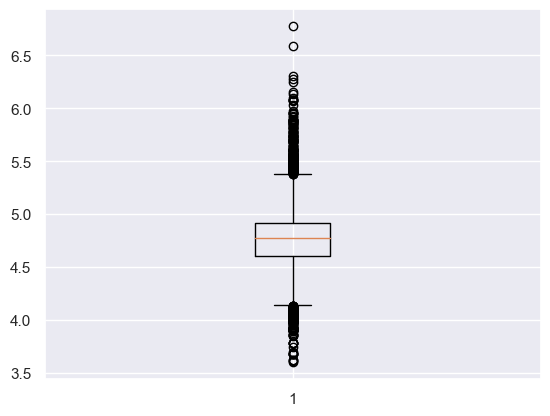

In [667]:
plt.figsize=(20,7)
# ax = plt.subplot(1, 3, 1)

plt.boxplot(np.log10(loan_df_imp_cols['annual_inc']))

# Bivarient Analysis

In [668]:
loan_df_imp_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   installment           38577 non-null  float64
 4   term_in_months        38577 non-null  int64  
 5   int_rate              38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   purpose               38577 non-null  object 
 10  dti                   38577 non-null  float64
 11  emp_length            37544 non-null  float64
 12  loan_issue_month      38577 non-null  object 
 13  home_ownership        38577 non-null  object 
 14  verification_status   38577 non-null  object 
 15  loan_status        

<AxesSubplot:>

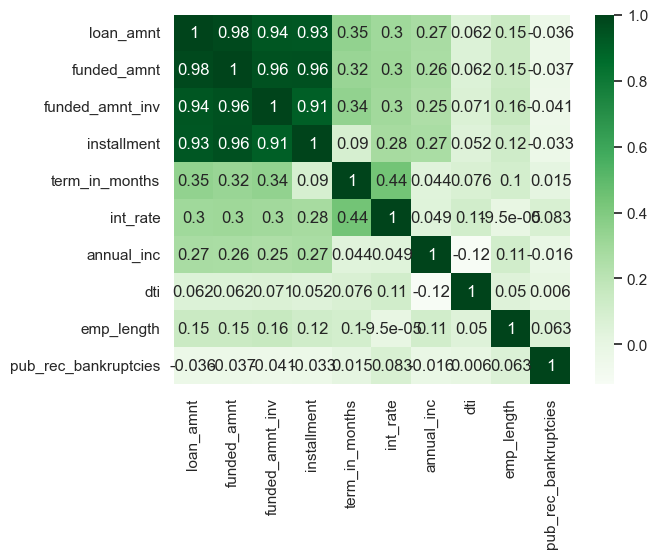

In [669]:
sns.heatmap(loan_df_imp_cols.corr(),cmap="Greens",annot=True)

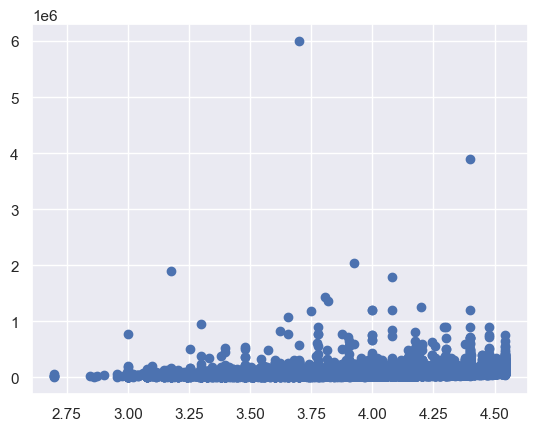

In [670]:
plt.scatter(np.log10(loan_df_imp_cols.loan_amnt),loan_df_imp_cols.annual_inc)

In [690]:
plt.figsize=(20,7)
numericvariables = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
       'emp_length','loan_status']
sns.pairplot(data=loan_df_imp_cols[numericvariables],hue="loan_status")

#### New column addition to display the target variable as a numeric value 

In [672]:

loan_df_imp_cols['loan_status_new']= loan_df_imp_cols['loan_status'].map({'Charged Off':1,'Fully Paid':0})

### Defining a function to generate bi variate analyses between the target and the chosen categorical variables

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

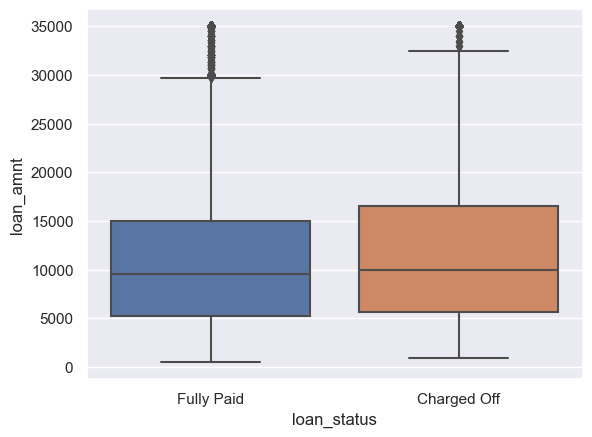

In [673]:
sns.boxplot(x='loan_status',y='loan_amnt',data=loan_df_imp_cols)

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt'>

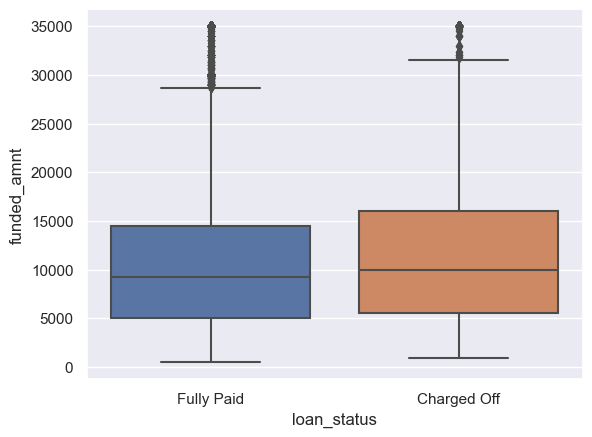

In [674]:
sns.boxplot(x='loan_status',y='funded_amnt',data=loan_df_imp_cols)

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt_inv'>

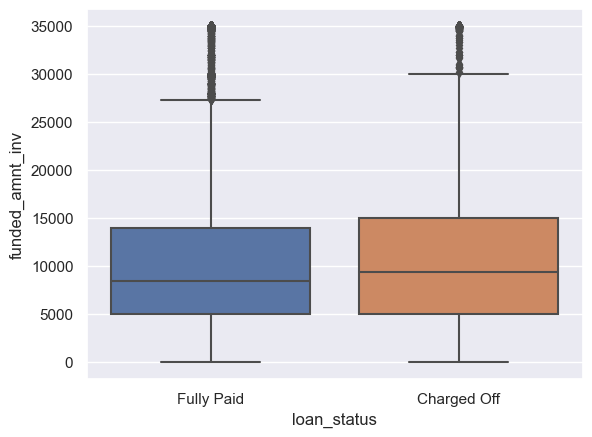

In [675]:
sns.boxplot(x='loan_status',y='funded_amnt_inv',data=loan_df_imp_cols)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc_new'>

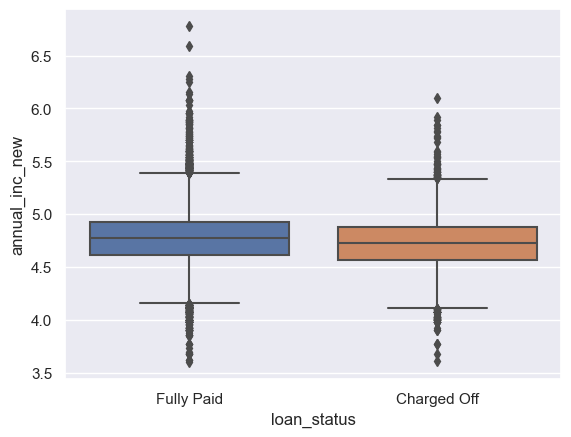

In [676]:
loan_df_imp_cols['annual_inc_new'] = loan_df_imp_cols.annual_inc.apply(lambda x:np.log10(x))
sns.boxplot(x='loan_status',y='annual_inc_new',data=loan_df_imp_cols)

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

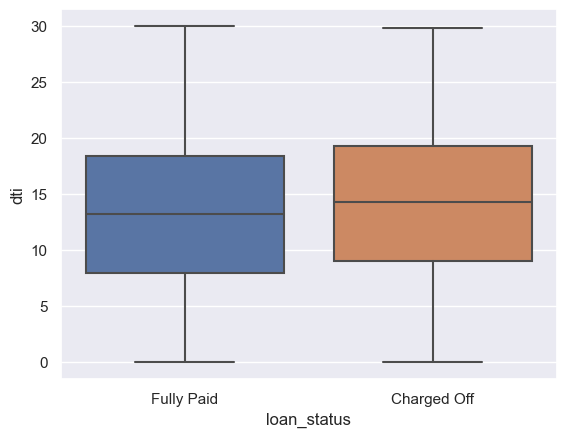

In [677]:
sns.boxplot(x='loan_status',y='dti',data=loan_df_imp_cols)

In [678]:
def plot_bivariante_stats(df_data,feature,label_rotation=False):
    sns.set(font_scale=1)

    # Calculate the percentage of loan_status_new =1 per category value
    cat_perc = df_data[[feature, 'loan_status_new']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='loan_status_new', ascending=False, inplace=True)
    sns.set_style("whitegrid")
    
    s = sns.barplot(x = feature, y='loan_status_new', data=cat_perc)

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    plt.ylabel('Percent of charged Off [%]')
    
    plt.tick_params(axis='both', which='major')
    plt.subplots_adjust(wspace=0.2, top=0.9)
    plt.show();

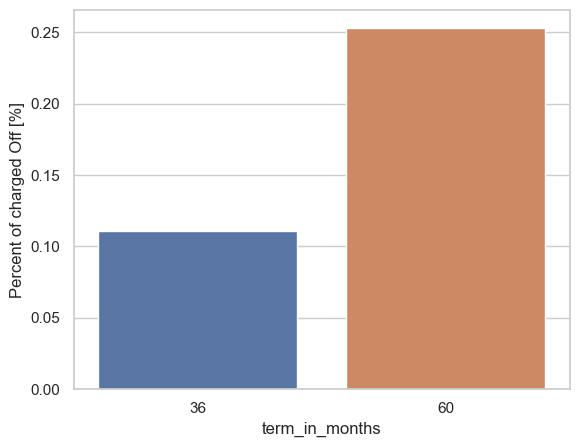

In [679]:
plot_bivariante_stats(loan_df_imp_cols,'term_in_months')

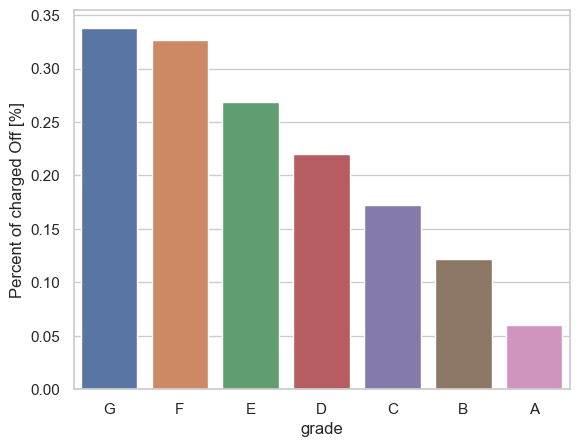

In [680]:
plot_bivariante_stats(loan_df_imp_cols,'grade')

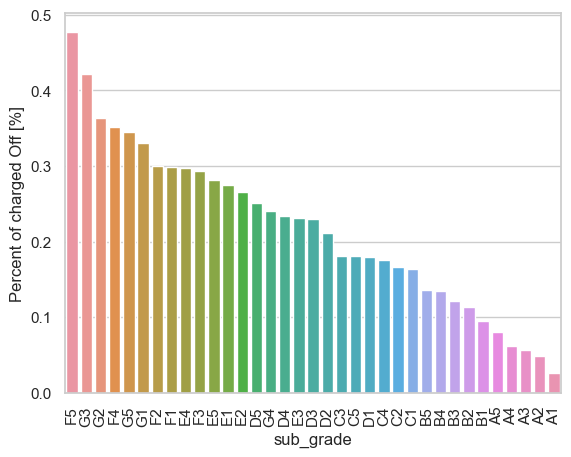

In [681]:
plot_bivariante_stats(loan_df_imp_cols,'sub_grade',True)

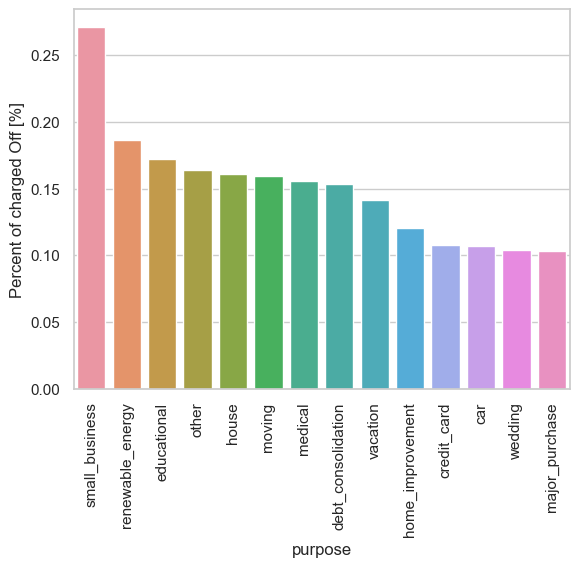

In [682]:
plot_bivariante_stats(loan_df_imp_cols,'purpose',True)

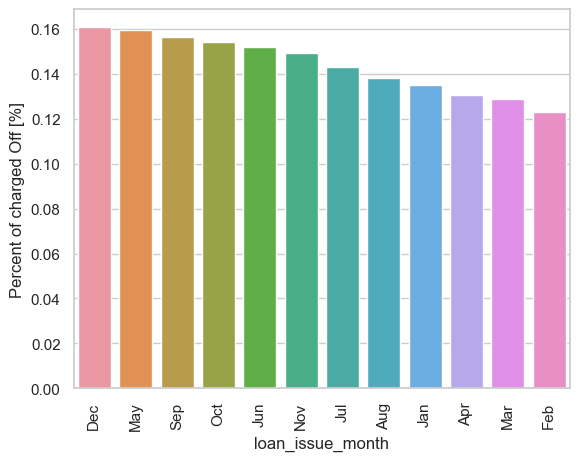

In [683]:
plot_bivariante_stats(loan_df_imp_cols,'loan_issue_month',True)

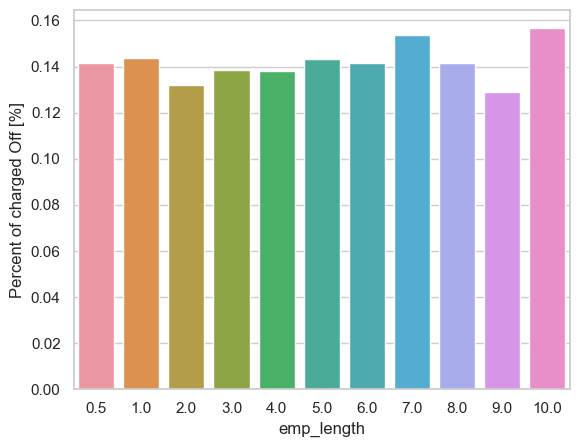

In [684]:
plot_bivariante_stats(loan_df_imp_cols,'emp_length')

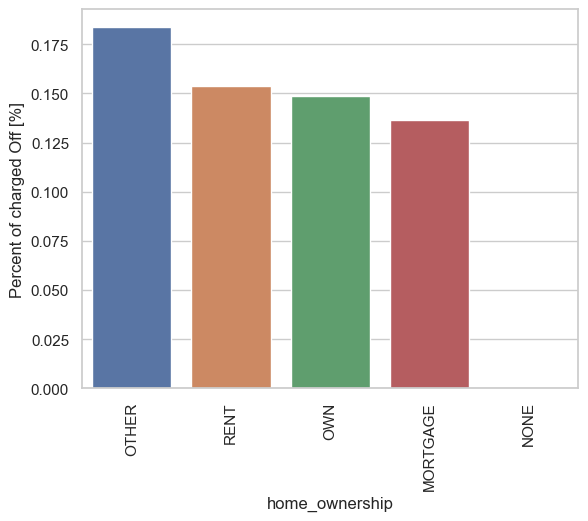

In [685]:
plot_bivariante_stats(loan_df_imp_cols,'home_ownership',True)

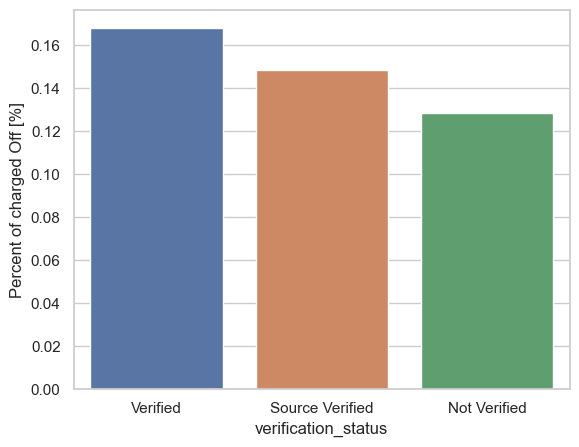

In [686]:
plot_bivariante_stats(loan_df_imp_cols,'verification_status')

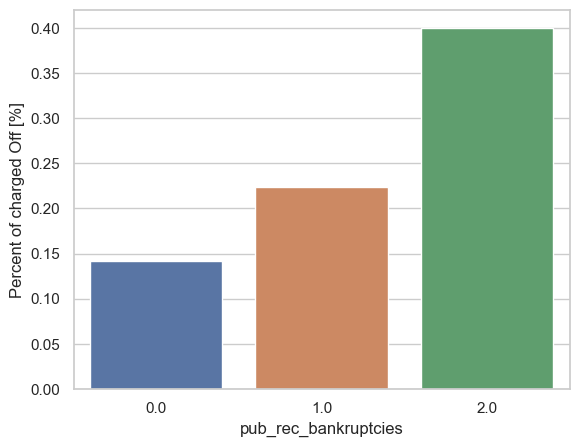

In [687]:
plot_bivariante_stats(loan_df_imp_cols,'pub_rec_bankruptcies')

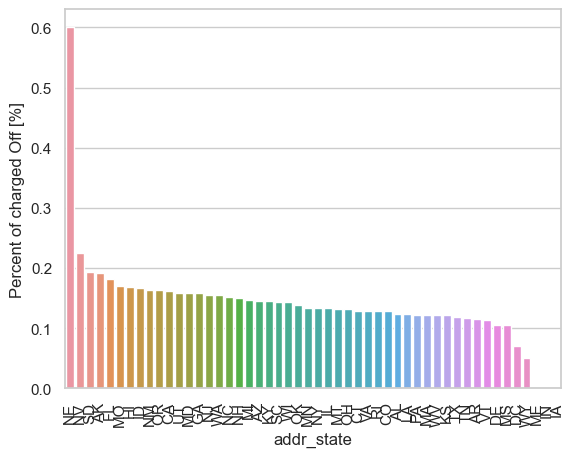

In [689]:
plot_bivariante_stats(loan_df_imp_cols,'addr_state',True)